_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Übung 05 - Wirtschaftswissenschaften: Daten finden, einlesen und mit Histogrammen visualisieren
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
 Mit dieser Übung beginnen wir eine Fallstudie, die sich mit (historischen) Datensätzen aus den Wirtschaftswissenschaften beschäftigt. Alle verwendeten Datensätze sind [hier](https://clio-infra.eu/) öffentlich verfügbar. Außerdem werden wir uns damit beschäftigen, wie wir die gewonnenen Informationen am besten visualisieren können. Die aktuelle Übung gliedert sich in drei Teile:
* [Daten beschaffen](#daten_beschaffen)
* [Daten erkunden](#daten_erkunden)
* [Histogramme](#histogramme)  

Für die folgenden Übungen gibt es kein Lehrvideo. Deswegen wird es in den Jupyter-Notebooks zu den Übungen mehr Erklärungen und Zwischenschritte geben. Darüber hinaus haben ab dieser Woche auch nicht mehr alle Übungen der verschiedenen Übungsgruppen den exakt gleichen Inhalt, da einige Themenbereiche etwas unterschiedliche Werkzeuge brauchen als andere. Das Konzept ist aber überall das gleiche.

<a name="daten_beschaffen"></a>1. Daten beschaffen
---
**A.** Mache dich mit der Datenquelle vertraut: Wer hat die Daten gesammelt und in welchem Kontext publiziert?   
**B.** Laden der Daten: lade die folgenden drei Datensätze (jeweils im "broad" Format) herunter und speichere sie in einem Unterordner ```daten```:
* [Number of Days Lost in Labour Disputes](https://clio-infra.eu/data/NumberofDaysLostinLabourDisputes_Broad.xlsx)
* [Number of Labour Disputes](https://clio-infra.eu/data/NumberofLabourDisputes_Broad.xlsx)
* [Number of Workers Involved in Labour Disputes](https://clio-infra.eu/data/NumberofWorkersInvolvedinLabourDisputes_Broad.xlsx)

Die Dateien liegen im ```.xlsx``` Format vor. Wir können sie mit Hilfe der Funktion ```read_excel()``` der Bibliothek ```pandas``` laden:

In [3]:
# importiere die Bibliothek pandas zum laden der
# Datensätze als DataFrame
import pandas as pd

# Dateiname 
fname_streiks = 'NumberofLabourDisputes_Broad.xlsx'
# lade die Datei als pandas DataFrame
streiks = pd.read_excel("daten/" + fname_streiks)
streiks.head()

,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**C.** Welche Informationen enthalten die einzelnen Spalten?

[Anfang](#top)

<a name="daten_erkunden"></a>2. Daten erkunden
---
Zu Beginn möchten wir ein paar grundlegende Dinge über den Datensatz herausfinden: z.B. die Anzahl der Länder und der erfasste Zeitraum.  
Die Namen der Spalten eines DataFrame lassen sich über die Variable ```columns``` des DataFrames ausgeben:

In [4]:
# eine Liste der im DataFrame enthaltenen Spalten
streiks.columns

Index(['ccode', 'country name', '1500', '1501', '1502', '1503', '1504', '1505',
       '1506', '1507',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=518)

In einem DataFrame können wir auf eine bestimmte Spalte mit ihrem Namen zugreifen:

In [5]:
# zeigt die Spalte mit dem Namen "country name" an
streiks['country name']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
193      Venezuela
194        Vietnam
195          Yemen
196         Zambia
197       Zimbabwe
Name: country name, Length: 198, dtype: object

### Aufgaben
**A.** Sieh dir ein paar Einträge aus dem Datensatz an, indem du auf den Index zugreifst. <font color='green'>**HINWEIS:** Um auf eine Zeile direkt zuzugreifen, kannst du ```DataFrame.loc[index]``` (siehe [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) für Beispiele) benutzen.</font>  
**B.** Welche Zeitspanne deckt der Datensatz ab?  
**C.** Wieviele verschiedene Länder befinden sich im Streik-Datensatz? Gibt es Länder-Duplikate (also kommen Länder zwei mal vor)? <font color='green'>**HINWEIS:** das ```DataFrame``` hält hier eine praktische [Funktion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) vor, mit der sich nach Duplikaten filtern lässt. </font>  
**D. (Optional)** Hast du eine Idee, warum der Datensatz diese Duplikate enthält? Finde heraus, welcher der Duplikat-Einträge verlässlicher erscheint und behalte ihn, entferne die anderen Duplikat-Einträge aus dem Datensatz.  <font color='green'>**HINWEIS:** die Funktionen ```isna()``` (siehe Aufgabe **2.E**) und ```drop()``` (siehe [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) könnte hier hilfreich sein. </font>   

Manche Spalten enthalten nur sporadisch Einträge und sind sonst leer. Fehlende Einträge werden im ```DataFrame``` als ```NaN``` ([not a number](https://de.wikipedia.org/wiki/NaN)) dargestellt. Insbesondere für Jahre, die weit in der Vergangenheit liegen ist die Datenlage sehr dünn. Die Anzahl der ```NaN```-Einträge lässt sich mit der Funktion ```isna()``` herausfinden:

In [6]:
# in der Spalte "1500" des Datensatzes z.B.
# gibt es 198 fehlende Einträge (also alle)
streiks["1500"].isna().sum()

198

In [7]:
# in der Zeile 0 des Datensatzes (Afghanistan)
# gibt es 516 fehlende Einträge
streiks.loc[0].isna().sum()

516

**E.** Finde für jedes Land heraus, wieviele (fehlende) Einträge es gibt. Erstelle ein neues ```DataFrame```, das jeweils das Land  und die Anzahl der Einträge enthält.  
**F.** Welche Länder haben die meisten Einträge? In für welche Länder ist am wenigsten Information enthalten?  
**G. (Optional)** Analysiere die Anzahl der fehlenden Einträge auch für die verschiedenen Jahre: für welche Jahre ist am wenigsten/meisten Information vorhanden?    
**H. (Optional)** Erstelle mit Hilfe der Bibliothek ```matplotlib.pyplot``` eine Visualisierung, in der die Anzahl der fehlenden Einträge über den Verlauf der Jahre dargestellt sind (ein sog. "line-plot"). Gibt es einen Trend und wie lässt sich dieser evtl. erklären? <font color='green'>**HINWEIS:** [Hier](https://matplotlib.org/tutorials/introductory/pyplot.html) findest du ein Beispiel für so eine Darstellung [Hier](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) ist die Funktion ```plot()``` dokumentiert. </font>  
**I. (Optional)** Erstelle (ebenfalls mit ```matplotlib.pyplot```) ein sog. "bar-chart", in dem die Anzahl der  Einträge je Land visualisiert sind. <font color='green'>**HINWEIS:** [Hier](https://pythonspot.com/matplotlib-bar-chart/) findest du ein Beispiel für ein bar-chart und [Hier](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) ist die Funktion ```bar()``` dokumentiert. </font>  
**J. (Optional)** Warum eignet sich ein bar-chart für die Darstellung der Datenlage der Länder während für die Darstellung der Datenlage über die Zeit ein line-plot besser geeignet ist?

[Anfang](#top)

<a name="histogramme"></a>3. Histogramme
---
Im folgenden Abschnitt werden wir damit beginnen, die gewonnenen Informationen zu visualisieren. Eine sehr einfache Visualisierung ist das Histogramm, eine graphische Darstellung der Häufigkeit eines Merkmals. Zur Illustration erstellen wir eine kleine Visualisierung der Verteilung von Werten in einer Liste:

In [10]:
%matplotlib inline

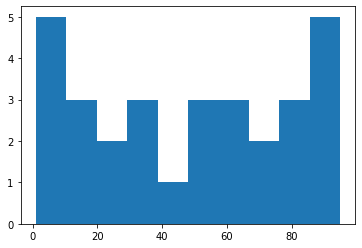

In [11]:
# eine Liste mit 30 Ganzzahlen, die z.B. das Alter von Personen in einer
# Gruppe darstellen können
alter = [37, 20, 84,  2, 11, 89, 52, 65, 90, 21, 30, 12, 17, 53, 62, 45, 37,
        3,  6, 64, 85,  6, 95, 73, 68, 55, 86, 83, 91,  1]

# für Visualisierungen benutzen wir die Blbiothek "matplotlib.pyplot"
import matplotlib.pyplot as plt

# Histogramme lassen sich einfach mit der Funktion plt.hist() erstellen
plt.hist(alter);

Visualisierungen sollten immer mit Achsenbeschriftungen versehen werden. Dafür verwenden wir die Funktionen ```plt.xlabel()``` und ```plt.ylabel```. Außerdem können wir der Abbildung mit ```plt.title()``` einen Titel geben. Mit verschiedenen optionalen Argumenten lässt sich das Verhalten von ```plt.hist()``` anpassen:
* ```bins``` ändert die Anzahl der Bins
* ```range``` ändert den dargestellten Bereich auf der x-Achse
* ```rwidth``` ändert die dargestellte bin-Weite 
* ```color``` ändert die Farbe
* ```alpha``` ändert den Alpha-Wert (Durchsichtigkeit) der dargestellten Balken.

Plot-Funktionen haben oftmals sehr viele optionale Argumente (auch "keyword arguments" genannt). Um herauszufinden, wass die jeweiligen Funktionen alles können, lohnt sich ein Blick in die [Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Außerdem sollte jede Darstellung *immer* mit Achsenbeschriftungen und eventuell einem Titel versehen werden:

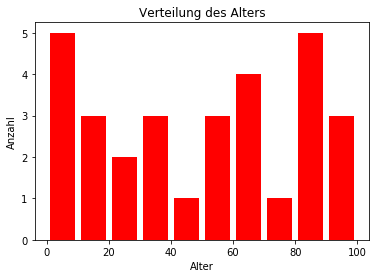

In [12]:
plt.hist(alter, color='red', rwidth=0.8, range=[0,100], bins=10, label='alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung des Alters');

### Aufgaben
**A.** Erstelle ein Histogramm der Anzahl der Streiks im Jahr 2010.  <font color='green'>**HINWEIS:** Damit das funktioniert, musst du mit der Funktion ```dropna()``` alle ```NaN```-Werte entfernen.</font>   
**B.** Mache dich mit den unterschiedlichen Argumenten der Funktion ```plt.hist()``` vertraut, indem du verschiedene Werte und Kombinationen für die Daten ausprobierst. Finde Werte, die die Daten deiner Meinung nach gut und verständlich darstellen. Worauf kommt es dabei an? Versieh die Darstellung mit passenden Beschriftungen.  
**C.** Insbesondere das Argument ```bins``` verändert die Darstellung des Histogrammes sehr stark. Was kann schiefgehen, wenn ```bins``` zu niedrig oder zu hoch gewählt wird? Was ist eine gute Wahl für einen Datensatz?  
**D.** Visualisiere die Anzahl der Streiks im Jahr 1950 im selben Histogram. Kannst du eine Aussage über die Entwicklung des Streikverhaltens ableiten? <font color='green'>**HINWEIS:** Du kannst einfach in der selben Code-Zelle zwei mal hintereinander die Funktion ```plt.hist()``` (natürlich mit unterschiedlichen Daten) aufrufen, um die Daten übereinandergelegt darzustellen. Du kannst mit der Funktion ```plt.legend()``` eine Legende zur Abbildung hinzufügen. Damit das funktioniert, musst du den einzelen plot-Befehlen vorher ein entsprechendes ```label``` Argument mitgeben.</font> Was fällt dir auf? Worauf musst du achten, damit die beiden Histogramme vergleichbar sind?  
**E. (Optional)** Was hat es mit den beiden keyword arguments ```density``` und ```cumulative``` auf sich? Wie verändert sich das Histogram und wie kann die Darstellung dann interpretiert werden?

[Anfang](#top)